# Matplotlib

![](img/matplotlib_anatomy.jpg)

There are several layers to matplotlib. The best way to start is to use the scripting layer pyplot.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# MS share price
file = 'data/ms_share_price/HistoricalQuotes.csv'
data = pd.read_csv(file)
data

,Date,Close/Last,Volume,Open,High,Low
0,10/23/2020,$216.23,18879610,$215.03,$216.28,$213.16
1,10/22/2020,$214.89,22351450,$213.93,$216.055,$211.7
2,10/21/2020,$214.8,22724910,$213.12,$216.92,$213.12
3,10/20/2020,$214.65,22753510,$215.8,$217.37,$213.0901
4,10/19/2020,$214.22,27625840,$220.415,$222.3,$213.72
...,...,...,...,...,...,...
247,10/31/2019,$143.37,24605140,$144.9,$144.93,$142.99
248,10/30/2019,$144.61,18496590,$143.52,$145,$142.79
249,10/29/2019,$142.83,20589470,$144.08,$144.5,$142.65
250,10/28/2019,$144.19,35280140,$144.4,$145.67,$143.51


In [3]:
data.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [4]:
# set Date to datetime and make it index
data.Date = pd.to_datetime(data.Date)
data = data.set_index(data.Date)
data.dtypes

Date           datetime64[ns]
 Close/Last            object
 Volume                 int64
 Open                  object
 High                  object
 Low                   object
dtype: object

In [5]:
data

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
2020-10-23,2020-10-23,$216.23,18879610,$215.03,$216.28,$213.16
2020-10-22,2020-10-22,$214.89,22351450,$213.93,$216.055,$211.7
2020-10-21,2020-10-21,$214.8,22724910,$213.12,$216.92,$213.12
2020-10-20,2020-10-20,$214.65,22753510,$215.8,$217.37,$213.0901
2020-10-19,2020-10-19,$214.22,27625840,$220.415,$222.3,$213.72
...,...,...,...,...,...,...
2019-10-31,2019-10-31,$143.37,24605140,$144.9,$144.93,$142.99
2019-10-30,2019-10-30,$144.61,18496590,$143.52,$145,$142.79
2019-10-29,2019-10-29,$142.83,20589470,$144.08,$144.5,$142.65


In [6]:
data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [7]:
# remove white space from cols
data.rename(columns = lambda x: x.strip(), inplace = True)
data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [8]:
# remove dollar sign from prices and make them floats
data['Close/Last'] = data['Close/Last'].str.replace('$', '')
data['Close/Last'] = data['Close/Last'].astype(float)
data['High'] = data['High'].str.replace('$', '')
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].str.replace('$', '')
data['Low'] = data['Low'].astype(float)
data['Volume'] = data['Volume'].astype(int)

/var/folders/pg/4f8z0jtj2xz_sh4vxv1dxcpr0000gp/T/ipykernel_54314/3726367024.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace('$', '')
/var/folders/pg/4f8z0jtj2xz_sh4vxv1dxcpr0000gp/T/ipykernel_54314/3726367024.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['High'] = data['High'].str.replace('$', '')
/var/folders/pg/4f8z0jtj2xz_sh4vxv1dxcpr0000gp/T/ipykernel_54314/3726367024.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Low'] = data['Low'].str.re

In [9]:
data.dtypes
data['Open'] = data['Open'].str.replace('$', '')
data['Open'] = data['Open'].astype(float)
data.dtypes

/var/folders/pg/4f8z0jtj2xz_sh4vxv1dxcpr0000gp/T/ipykernel_54314/588102194.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Open'] = data['Open'].str.replace('$', '')


Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

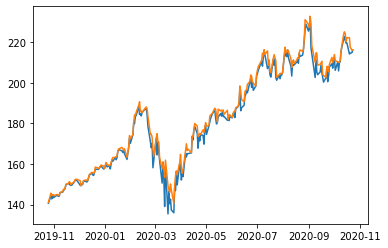

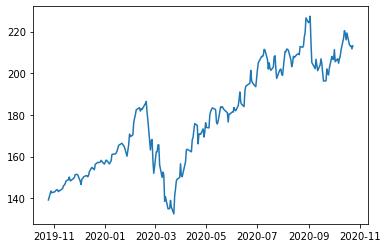

In [10]:
plt.plot(data.Date,data['Close/Last'])
plt.plot(data.Date,data['High'])
plt.show()
plt.plot(data.Date,data['Low'])

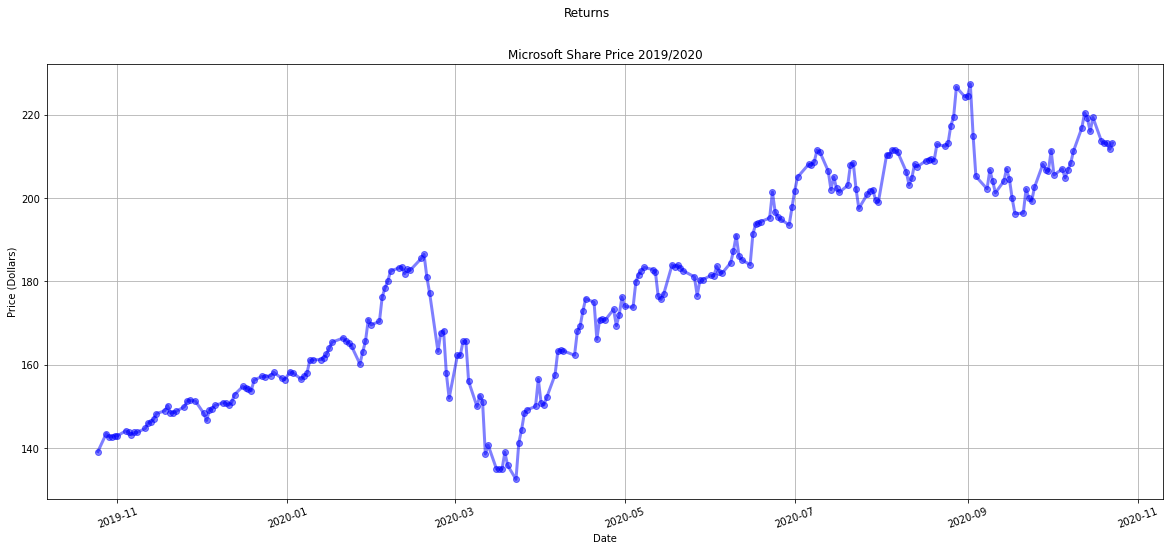

In [11]:
plt.figure(figsize = (20,8))
plt.plot(
  data.Date,
  data['Low'],
  color = 'b',
  marker = 'o',
  linewidth = 3,
  alpha = 0.5
)
plt.title('Microsoft Share Price 2019/2020')
plt.suptitle('Returns')
plt.xlabel('Date')
plt.ylabel('Price (Dollars)')
plt.xticks(rotation = 20)
plt.grid(True)
plt.show()

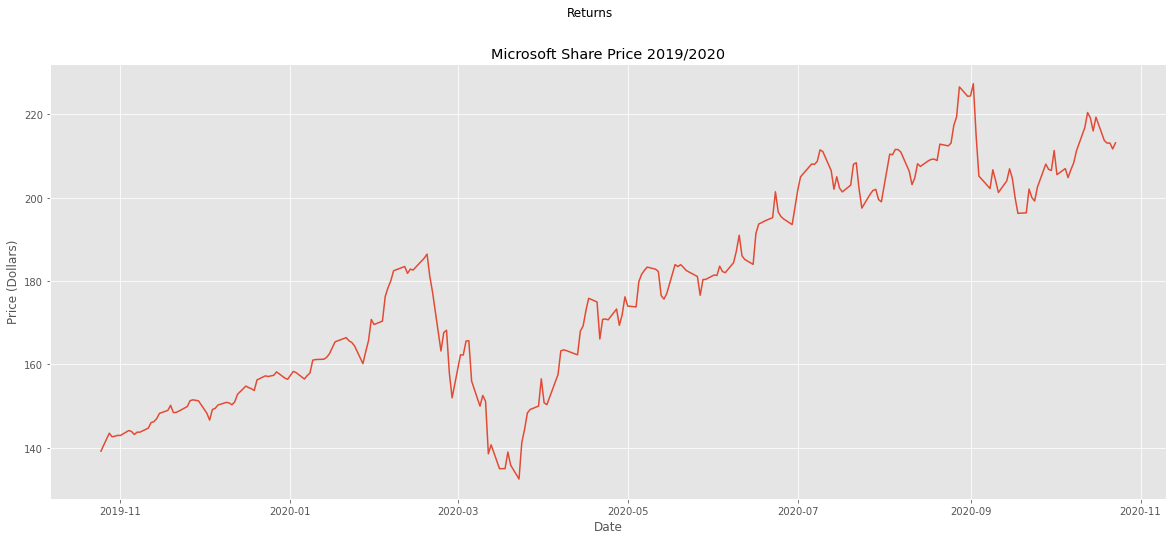

In [12]:
# Change the style
plt.style.use('ggplot')
plt.figure(figsize = (20, 8))
plt.plot(data.Date, data['Low'])
plt.title('Microsoft Share Price 2019/2020')
plt.suptitle('Returns')
plt.xlabel('Date')
plt.ylabel('Price (Dollars)')
plt.show()

In [13]:
# We can get a list of available styles
plt.style.available[:]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [14]:
# When we use plt, matplotlib creates the figure for us. For more control we can create our own figure
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

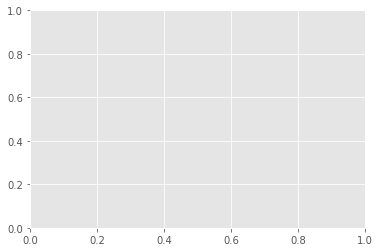

In [15]:
# The above creates 1 figure on to which we can add axes
ax = plt.axes()

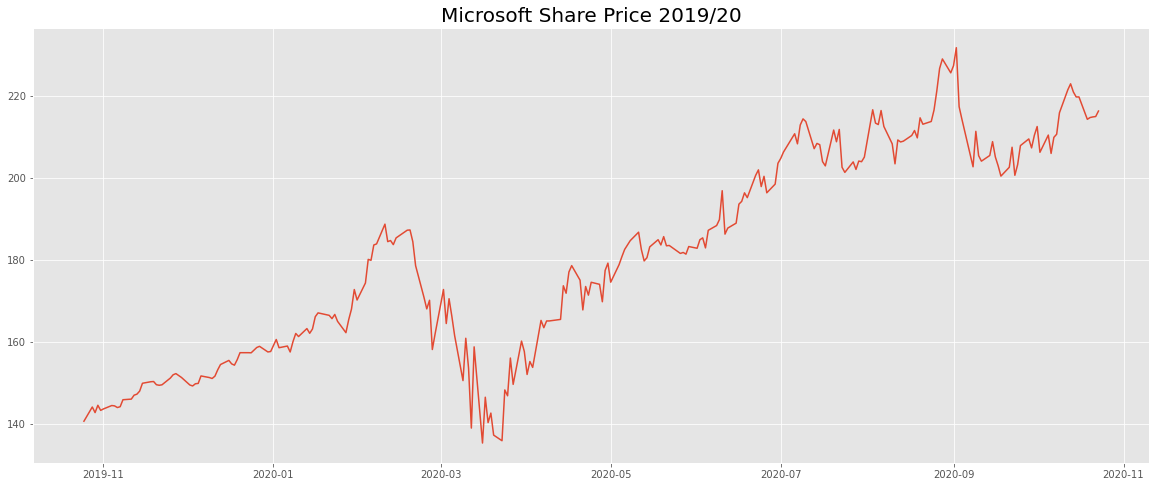

In [16]:
# Once we have the axes object we can plot data
fig = plt.figure(figsize = (20, 8))
ax = plt.axes()
ax.plot(data.Date, data['Close/Last'])
ax.set_title(
  'Microsoft Share Price 2019/20',
  color = 'black',
  fontsize = 20
)
plt.show()

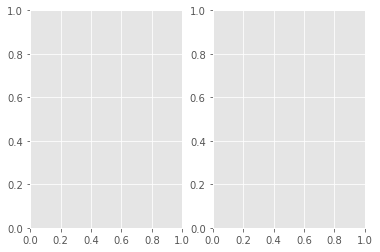

In [17]:
# Using fig and ax enables us have subplots
# We use plt.subplots(num_rows, num_cols)
fig, (ax1, ax2) = plt.subplots(1, 2)

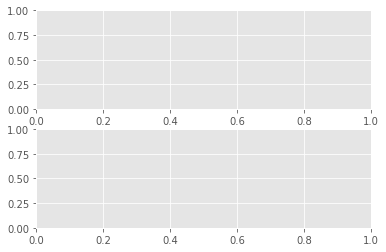

In [18]:
# 2 rows, 1 column
fig, (ax1, ax2) = plt.subplots(2, 1)

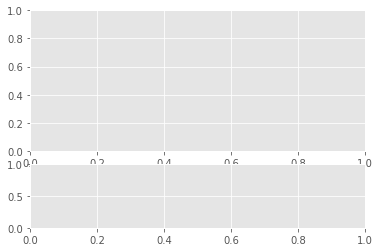

In [19]:
# Using subplots will give equal sized plots, add_gridspec allows the width to be specified
fig = plt.figure()
grid = fig.add_gridspec(3, 1)
upper = fig.add_subplot(grid[0:2, 0])
lower = fig.add_subplot(grid[2, 0])

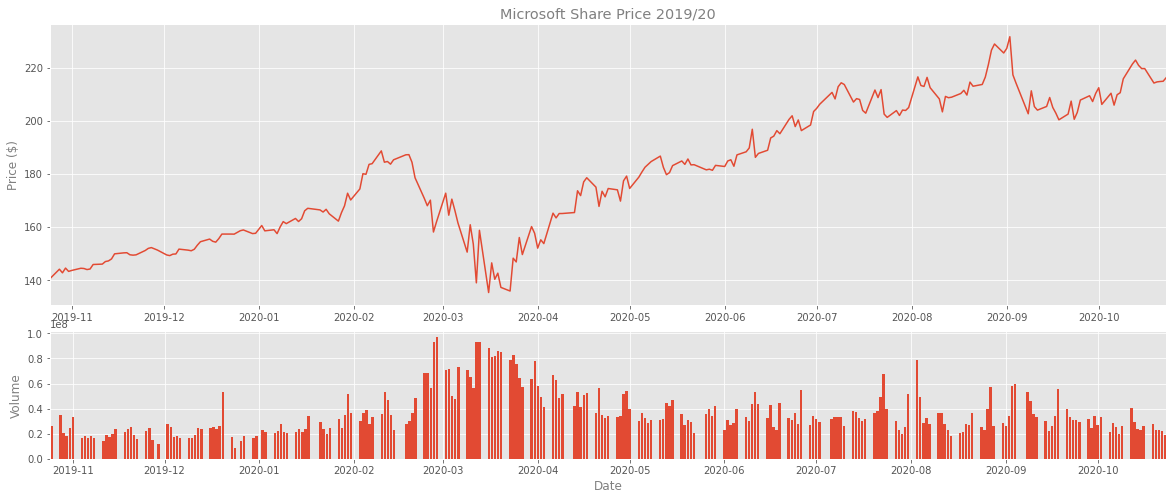

In [20]:
# Now we can plot volume data
fig = plt.figure(figsize = (20, 8))
grid = fig.add_gridspec(3, 1)
upper = fig.add_subplot(grid[0:2, 0])
lower = fig.add_subplot(grid[2, 0])
upper.plot(data.Date, data['Close/Last'])
lower.bar(data.Date, data['Volume'])
upper.set_title('Microsoft Share Price 2019/20', color = 'gray')
upper.set_ylabel('Price ($)', color = 'gray')
lower.set_ylabel('Volume', color = 'gray')
lower.set_xlabel('Date', color = 'gray')
upper.autoscale(enable = True, axis = 'x', tight = True)
lower.autoscale(enable = True, axis = 'x', tight = True)
plt.show()

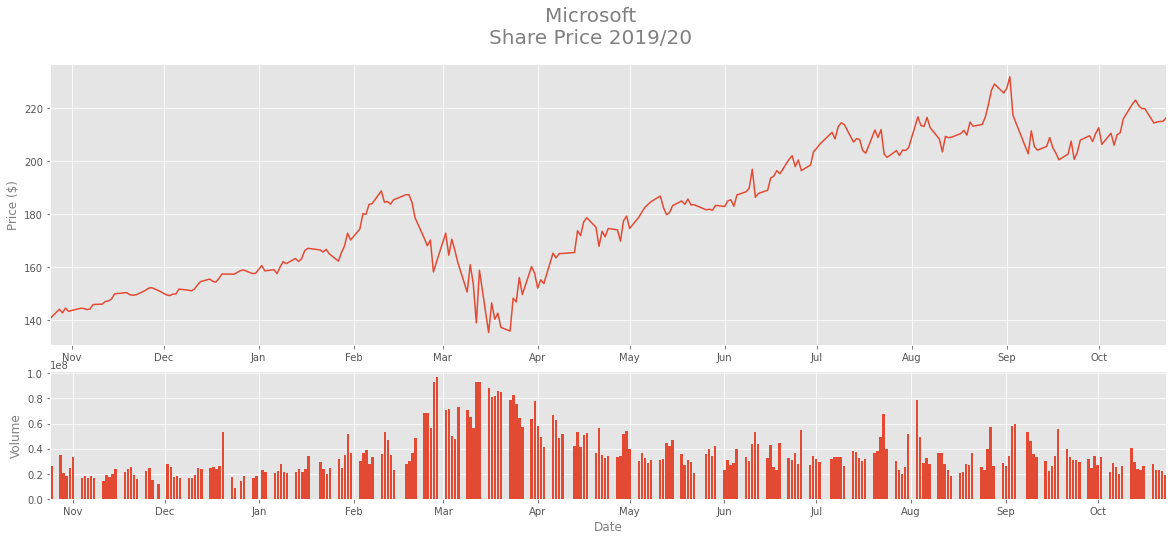

In [21]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig = plt.figure(figsize = (20, 8))
fig.suptitle('Microsoft\nShare Price 2019/20', color = 'gray', fontsize = 20)
grid = fig.add_gridspec(3, 1)
upper = fig.add_subplot(grid[0:2, 0])
lower = fig.add_subplot(grid[2, 0])
upper.plot(data.Date,data['Close/Last'])
lower.bar(data.Date,data['Volume'])
upper.set_ylabel('Price ($)', color = 'gray')
lower.set_ylabel('Volume', color = 'gray')
lower.set_xlabel('Date', color = 'gray')
upper.autoscale(enable = True, axis = 'x', tight = True)
lower.autoscale(enable = True, axis = 'x', tight = True)
date_form = DateFormatter('%b')
upper.xaxis.set_major_formatter(date_form)
lower.xaxis.set_major_formatter(date_form)
plt.savefig('img/msft_viz.png')
plt.show()